In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)
print('Successful!')

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.2
Successful!


Evaluating TS.......... 0.2 seconds
Regret: 16.50 +/- 2.48 (median: 17.00, max: 32.00, min: 1.00)
Evaluating PHE.......... 0.1 seconds
Regret: 18.20 +/- 2.03 (median: 20.00, max: 26.00, min: 7.00)
Evaluating PHE.......... 0.2 seconds
Regret: 15.50 +/- 2.49 (median: 16.50, max: 27.00, min: -1.00)
Evaluating HS-SampleWithReplacement.......... 0.1 seconds
Regret: 14.80 +/- 2.08 (median: 14.50, max: 24.00, min: 2.00)
Evaluating HS-SampleWithReplacement.......... 0.1 seconds
Regret: 14.20 +/- 2.17 (median: 13.50, max: 25.00, min: 4.00)
Evaluating HS-SampleWithReplacement.......... 0.2 seconds
Regret: 13.60 +/- 1.90 (median: 14.00, max: 23.00, min: 2.00)
Evaluating TS.......... 0.1 seconds
Regret: 14.73 +/- 1.78 (median: 14.24, max: 25.07, min: 5.94)
Evaluating PHE.......... 0.1 seconds
Regret: 13.33 +/- 1.31 (median: 14.46, max: 19.64, min: 5.74)
Evaluating PHE.......... 0.1 seconds
Regret: 8.31 +/- 0.56 (median: 8.74, max: 11.26, min: 4.96)
Evaluating HS-SampleWithReplacement.......... 0.1

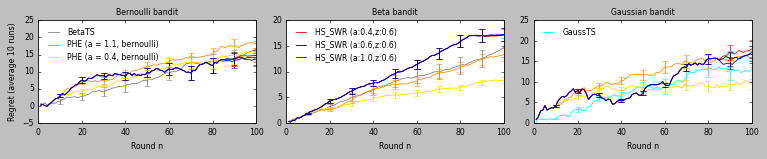

In [6]:
import datetime

algs = [
    ("TS", {}, "gray", "-", "BetaTS"),
  #  ("GaussTS", {}, "gray", "-", "GaussTS"),
  # ("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
    ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1, bernoulli)"),
    ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
  # ("HistorySwapping", {"swap_prob": 0.01}, "cyan", "-", "HS (swap_prob = 0.01)"),
  # ("HistorySwapping", {"swap_prob": 0.03}, "magenta", "-", "HS (swap_prob = 0.03)"),
  # ("HistorySwapping", {"swap_prob": 0.1}, "darkgreen", "-", "HS (swap_prob = 0.1)"),
  # ("HistorySwapping", {"swap_prob": 0.15}, "blue", "-", "HS (swap_prob = 0.15)"),
  # ("HistorySwapping_SWR", {"sample_portion": 0.03}, "magenta", "-", 
           #"HS_SWR (sample_portion = 0.03)"),
  # ("HS_SWR", {"sample_portion": 0.5}, "cyan", "-", 
  #            "HS_SWR_noise (sample_portion = 0.5)"),
    ("HS_SWR", {"sample_portion": 0.4, 'z': 0.6}, "red", "-", 
           "HS_SWR (a:0.4,z:0.6)"),
    ("HS_SWR", {"sample_portion": 0.6, 'z': 0.6}, "black", "-", 
           "HS_SWR (a:0.6,z:0.6)"),
    ("HS_SWR", {"sample_portion": 1.0, 'z': 0.6}, "blue", "-", 
           "HS_SWR (a:1.0,z:0.6)"),
  #   ("HS_SWR_MirrorPool", {"sample_portion": 0.5}, "black", "-", 
  #            "HS_SWR_mirror (sample_portion = 0.5)"),
  #   ("HS_SWR_MirrorPool", {"sample_portion": 0.8}, "blue", "-", 
  #            "HS_SWR_mirror (sample_portion = 0.8)"),
]
num_runs = 100
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(9.6, 2))
for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(BetaBandit(mu))
    else:
      env.append(GaussBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    if fig == 2 and alg[0] == 'TS':
        alg = ("GaussTS", {}, "cyan", "-", "GaussTS")
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 3 == fig or alg[0]=='GaussTS' else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Beta bandit")
  else:
    plt.title("Gaussian bandit")
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../exp_results/HS_SWR_asnoise_{}_{}_{}_{}.jpeg". \
          format(now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Gaussian TS.................................................................................................... 3.0 seconds
Regret: 58.08 +/- 1.56 (median: 55.43, max: 105.74, min: 32.73)
Evaluating Gaussian TS.................................................................................................... 3.1 seconds
Regret: 70.41 +/- 1.64 (median: 67.96, max: 131.73, min: 41.45)
Evaluating PHE.................................................................................................... 7.7 seconds
Regret: 105.08 +/- 2.09 (median: 104.54, max: 151.63, min: 58.57)
Evaluating PHE.................................................................................................... 7.7 seconds
Regret: 34.15 +/- 1.69 (median: 31.29, max: 108.48, min: 8.45)
Evaluating HS-SampleWithReplacement.................................................................................................... 93.6 seconds
Regret: 45.68 +/- 1.94 (median: 41.99, max: 139.29, min: 0.96)
Evaluat

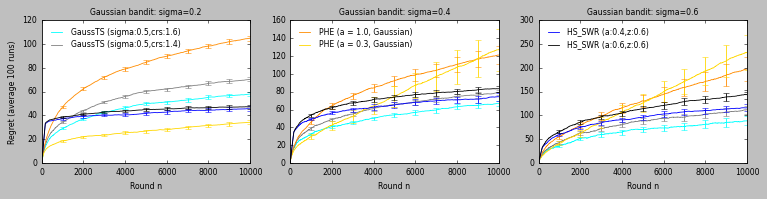

In [9]:
# Comparison with Gaussian Bandits
import datetime

algs = [
    ("GaussTS", {'crs':1.6}, "cyan", "-", "GaussTS (sigma:0.5,crs:1.6)"),
    ("GaussTS", {'crs':1.4}, "gray", "-", "GaussTS (sigma:0.5,crs:1.4)"),
    ("PHE", {"a": 1.0}, "darkorange", "-", "PHE (a = 1.0, Gaussian)"),
    ("PHE", {"a": 0.3}, "gold", "-", "PHE (a = 0.3, Gaussian)"),
    ("HS_SWR", {"sample_portion": 0.4, 'z': 0.6}, "blue", "-", 
           "HS_SWR (a:0.4,z:0.6)"),
    ("HS_SWR", {"sample_portion": 0.6, 'z': 0.6}, "black", "-", 
           "HS_SWR (a:0.6,z:0.6)"),
#     ("HS_SWR", {"sample_portion": 1.0, 'z': 0.6}, "red", "-", 
#            "HS_SWR (a:1.0,z:0.6)"),
]
num_runs = 100
n = 10000
K = 10
sigmas = [0.1, 0.3, 0.5]

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(9.6, 2.5))
for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu, sigma=sigmas[fig]))
    elif fig == 1:
      env.append(GaussBandit(mu, sigma=sigmas[fig]))
    else:
      env.append(GaussBandit(mu, sigma=sigmas[fig]))

  plt.subplot(1, 3, fig + 1)

  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 2 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])
    alg_num += 1

  if fig < 3:
    plt.title("Gaussian bandit: sigma={}".format(sigmas[fig]))
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../exp_results/Comparison_GaussBandit_{}_{}_{}_{}.jpeg". \
          format(now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating TS.................................................................................................... 8.3 seconds
Regret: 66.66 +/- 7.88 (median: 38.00, max: 471.21, min: 11.17)
Evaluating TS.................................................................................................... 8.3 seconds
Regret: 80.26 +/- 3.18 (median: 75.14, max: 196.70, min: 30.65)
Evaluating PHE.................................................................................................... 10.0 seconds
Regret: 60.18 +/- 2.20 (median: 55.22, max: 119.35, min: 14.32)
Evaluating PHE.................................................................................................... 10.2 seconds
Regret: 97.45 +/- 2.40 (median: 95.84, max: 171.30, min: 47.02)
Evaluating HS-SampleWithReplacement.................................................................................................... 96.4 seconds
Regret: 55.81 +/- 1.47 (median: 54.93, max: 121.51, min: 15.38)
Evaluating HS-SampleWit

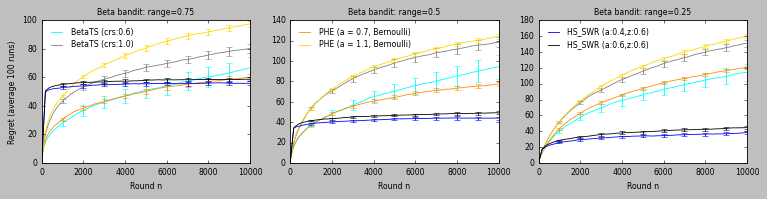

In [4]:
# Comparison with Gaussian Bandits with different mean reward ranges
import datetime

algs = [
#     ("GaussTS", {'crs':1.6}, "cyan", "-", "GaussTS (sigma:0.5,crs:1.6)"),
#     ("GaussTS", {'crs':1.4}, "gray", "-", "GaussTS (sigma:0.5,crs:1.4)"),
    ("TS", {'crs':0.6}, "cyan", "-", "BetaTS (crs:0.6)"),
    ("TS", {'crs':1.0}, "gray", "-", "BetaTS (crs:1.0)"),
#     ("PHE", {"a": 1.0}, "darkorange", "-", "PHE (a = 1.0, Gaussian)"),
#     ("PHE", {"a": 0.3}, "gold", "-", "PHE (a = 0.3, Gaussian)"),
    ("PHE", {"a": 0.7}, "darkorange", "-", "PHE (a = 0.7, Bernoulli)"),
    ("PHE", {"a": 1.1}, "gold", "-", "PHE (a = 1.1, Bernoulli)"),
    ("HS_SWR", {"sample_portion": 0.4, 'z': 0.6}, "blue", "-", 
           "HS_SWR (a:0.4,z:0.6)"),
    ("HS_SWR", {"sample_portion": 0.6, 'z': 0.6}, "black", "-", 
           "HS_SWR (a:0.6,z:0.6)"),
#     ("HS_SWR", {"sample_portion": 1.0, 'z': 0.6}, "red", "-", 
#            "HS_SWR (a:1.0,z:0.6)"),
]
num_runs = 100
n = 10000
K = 10
ranges = [0.75, 0.5, 0.25]

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(9.6, 2.5))
for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = ranges[fig] * np.random.rand(K) + (1-ranges[fig])/2
#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=0.6))
#     elif fig == 1:
#       env.append(GaussBandit(mu, sigma=0.6))
#     else:
#       env.append(GaussBandit(mu, sigma=0.6))

    if fig == 0:
      env.append(BetaBandit(mu))
    elif fig == 1:
      env.append(BetaBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 3, fig + 1)

  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 2 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])
    alg_num += 1

  if fig < 3:
    plt.title("Beta bandit: range={}".format(ranges[fig]))
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../exp_results/Comparison_BetaBandit_{}_{}_{}_{}.jpeg". \
          format(now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating HS-SampleWithReplacement.......................................... 37.6 seconds
Regret: 160.90 +/- 39.27 (median: 22.00, max: 940.00, min: 10.00)
Evaluating HS-SampleWithReplacement.......................................... 43.8 seconds
Regret: 173.29 +/- 5.07 (median: 168.50, max: 255.00, min: 123.00)
Evaluating HS-SampleWithReplacement.......................................... 39.6 seconds
Regret: 222.17 +/- 44.99 (median: 33.50, max: 912.00, min: 13.00)
Evaluating HS-SampleWithReplacement.......................................... 39.5 seconds
Regret: 165.79 +/- 5.14 (median: 163.00, max: 252.00, min: 85.00)


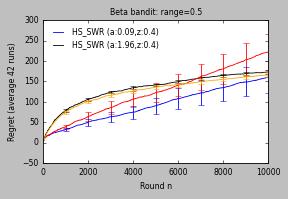

In [13]:
# Comparison with Gaussian Bandits with different mean reward ranges
import datetime

algs = [
    ("HS_SWR", {"sample_portion": 0.09, 'z': 0.4}, "blue", "-", 
           "HS_SWR (a:0.09,z:0.4)"),
    ("HS_SWR", {"sample_portion": 1.96, 'z': 0.4}, "black", "-", 
           "HS_SWR (a:1.96,z:0.4)"),
    ("HS_SWR_scale", {"sample_portion": 0.3, 'z': 0.4}, "red", "-", 
           "HS_SWR_scale (a:0.3,z:0.4)"),
    ("HS_SWR_scale", {"sample_portion": 1.4, 'z': 0.4}, "orange", "-", 
           "HS_SWR_scale (a:1.4,z:0.4)"),
#     ("PHE", {"a": 0.7}, "darkorange", "-", "PHE (a = 0.7, Bernoulli)"),
#     ("PHE", {"a": 1.1}, "gold", "-", "PHE (a = 1.1, Bernoulli)"),
]
num_runs = 42
n = 10000
K = 10
ranges = [0.5]

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(9.6, 2.5))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = ranges[fig] * np.random.rand(K) + (1-ranges[fig])/2
#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=0.4))
#     elif fig == 1:
#       env.append(GaussBandit(mu, sigma=0.4))
#     else:
#       env.append(GaussBandit(mu, sigma=0.4))

#     if fig == 0:
#       env.append(BetaBandit(mu))
#     elif fig == 1:
#       env.append(BetaBandit(mu))
#     else:
#       env.append(BetaBandit(mu))

    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(BerBandit(mu))
    else:
      env.append(BerBandit(mu))

  plt.subplot(1, 3, fig + 1)

  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=14)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 2 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])
    alg_num += 1

  if fig < 3:
    plt.title("Beta bandit: range={}".format(ranges[fig]))
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

# now = datetime.datetime.now()
# with open("../exp_results/Comparison_BetaBandit_{}_{}_{}_{}.jpeg". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()